In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. 
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 
# 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno ### ?

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 데이터셋 확인

In [148]:
df_train = pd.read_csv('tt_train.csv')
df_test = pd.read_csv('tt_test.csv')

In [149]:
df_train.head()
# 우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 
# 예측하려는 target label 은 Survived 입니다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


변수(feature, variable)	정의	설명	타입
survival	생존여부	target label 임. 1, 0 으로 표현됨	integer
Pclass	티켓의 클래스	1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature	integer
sex	성별	male, female 로 구분되며 binary	string
Age	나이	continuous	integer
sibSp	함께 탑승한 형제와 배우자의 수	quantitative	integer
parch	함께 탑승한 부모, 아이의 수	quantitative	integer
ticket	티켓 번호	alphabat + integer	string
fare	탑승료	continuous	float
cabin	객실 번호	alphabat + integer	string
embared	탑승 항구	C = Cherbourg, Q = Queenstown, S = Southampton	stri

In [150]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [151]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##  Null Data Check

In [152]:
for col in df_train.columns :
    msg = 'column: {:>10}\t percent of NAN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NAN value: 0.00%
column:   Survived	 percent of NAN value: 0.00%
column:     Pclass	 percent of NAN value: 0.00%
column:       Name	 percent of NAN value: 0.00%
column:        Sex	 percent of NAN value: 0.00%
column:        Age	 percent of NAN value: 19.87%
column:      SibSp	 percent of NAN value: 0.00%
column:      Parch	 percent of NAN value: 0.00%
column:     Ticket	 percent of NAN value: 0.00%
column:       Fare	 percent of NAN value: 0.00%
column:      Cabin	 percent of NAN value: 77.10%
column:   Embarked	 percent of NAN value: 0.22%


In [153]:
## df_train[col].shape[0]

In [154]:
for col in df_test.columns :
    msg = 'column: {:>10}\t percent of NAN value: {:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NAN value: 0.00%
column:     Pclass	 percent of NAN value: 0.00%
column:       Name	 percent of NAN value: 0.00%
column:        Sex	 percent of NAN value: 0.00%
column:        Age	 percent of NAN value: 20.57%
column:      SibSp	 percent of NAN value: 0.00%
column:      Parch	 percent of NAN value: 0.00%
column:     Ticket	 percent of NAN value: 0.00%
column:       Fare	 percent of NAN value: 0.24%
column:      Cabin	 percent of NAN value: 78.23%
column:   Embarked	 percent of NAN value: 0.00%


In [155]:
# Train, Test set 에서 Age(둘다 약 20%), Cabin(둘다 약 80%),
# Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있습니다.

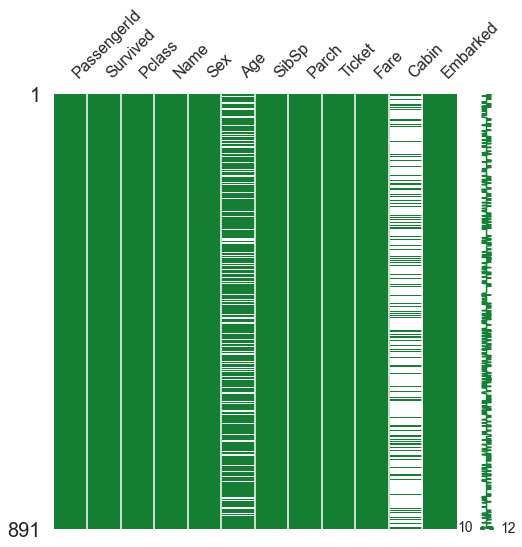

In [156]:
# MSNO 라이브러리를 사용하여 null data의 존재 확인
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8), color=(0.08,0.5,0.2))

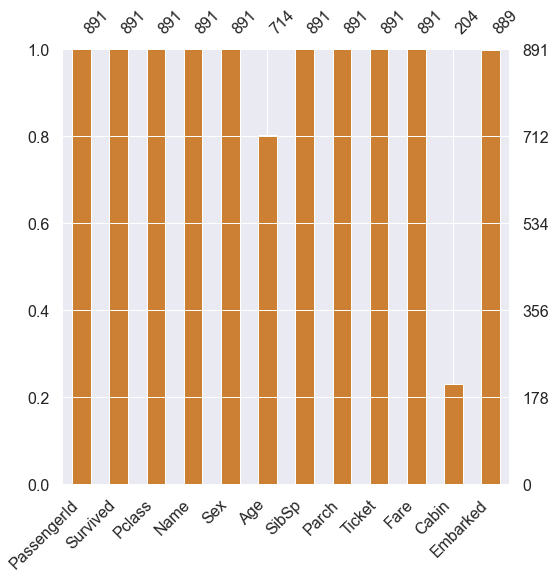

In [157]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

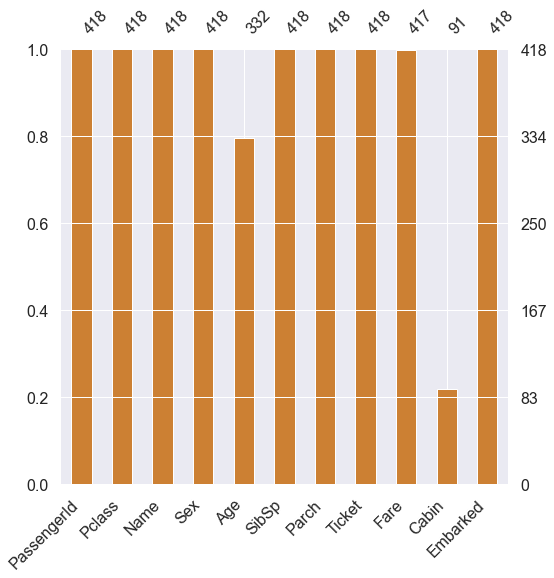

In [158]:
msno.bar(df=df_test.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

## Target label 확인

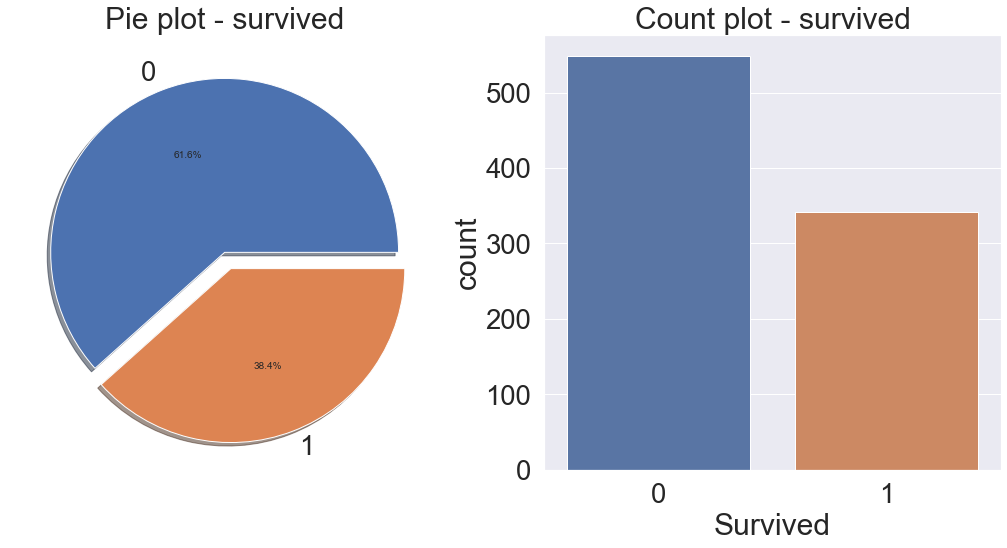

In [159]:
f,ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

* 안타깝게도 죽은 사람이 많습니다.
* 38.4 % 가 살아남았습니다.
* target label 의 분포가 제법 균일(balanced)합니다.  불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.


# Exploratory data analysis

* 이제 본격적으로 데이터 분석을 해보겠습니다. 데이터는 매우 많습니다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다.


* 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편합니다.


## Pclass (티켓의 클래스)

* 먼저 Pclass 에 대해서 살펴보겠습니다. Pclass 는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입입니다.


* 먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다.


* 'Pclass', 'Survived' 를 가져온 후, pclass 로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다.


* 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)사람의 총합을 주게 됩니다

In [160]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()
# as_index 구문은 이 그룹을 인덱스로 지정할 것인지 여부를 결정

,Survived
Pclass,
1,216
2,184
3,491


In [161]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [162]:
# pandas 의 crosstab 을 사용하면 좀 더 위 과정을 더 수월하게 볼 수 있음.
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


grouped 객체에 mean() 을 하게 되면,   
각 클래스별 생존률을 얻을 수 있습니다.  
class 1 이면 아래와 같습니다.  
80/(80+136)≈0.63

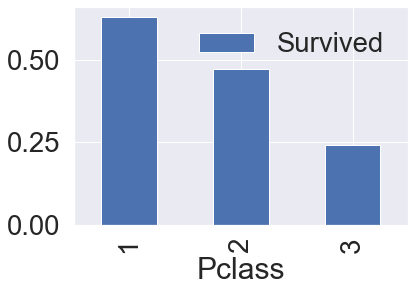

In [163]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

# Pclass 가 좋을 수록(1st) 생존률이 높은 것을 확인

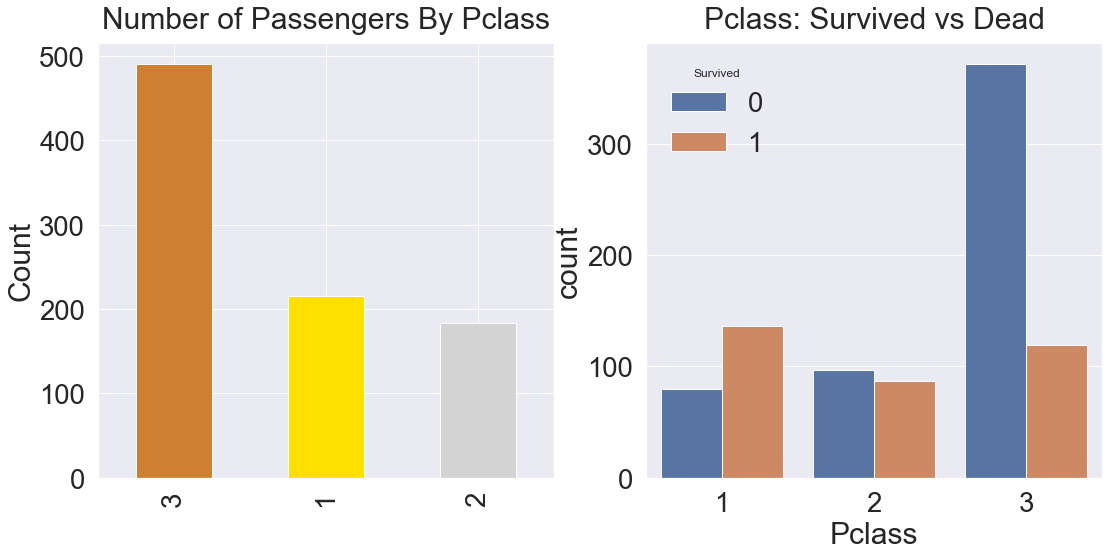

In [164]:
 # (좀 더 보기 쉽게)seaborn 의 countplot 을 이용하면, 특정 label 에 따른 개수를 확인가능

y_position = 1.02
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

# value_counts() 는 어떤 컬럼/Series의 unique value들을 count해주는 함수

* 클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있습니다. Pclass 1, 2, 3 순서대로 63%, 48%, 25% 입니다
* 우리는 생존에 Pclass 가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단할 수 있습니다.

## Sex

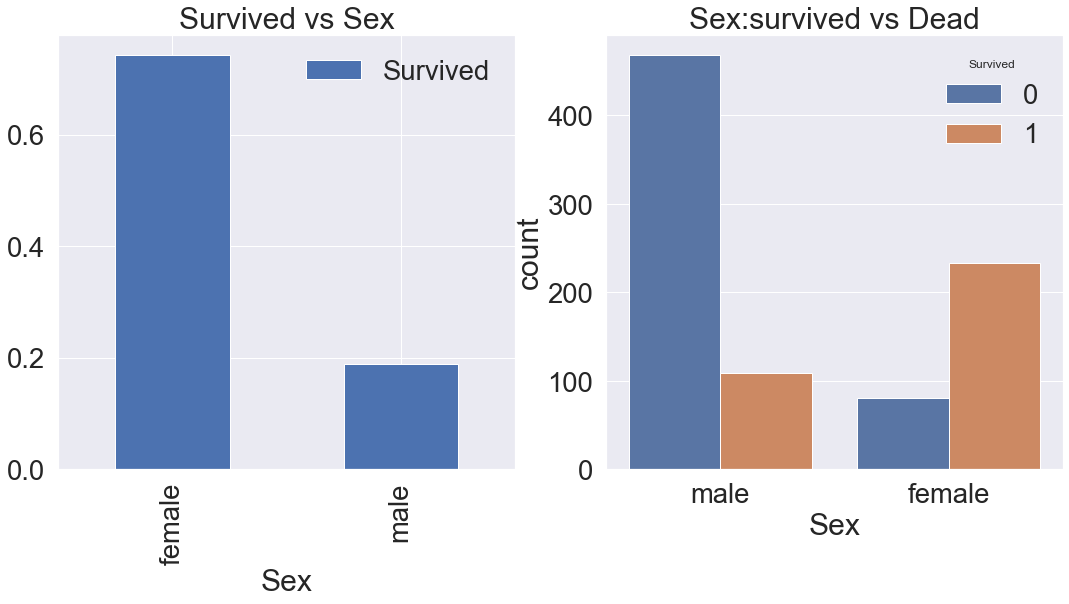

In [165]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:survived vs Dead')
plt.show()

In [166]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [167]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## Both Sex and Pclass

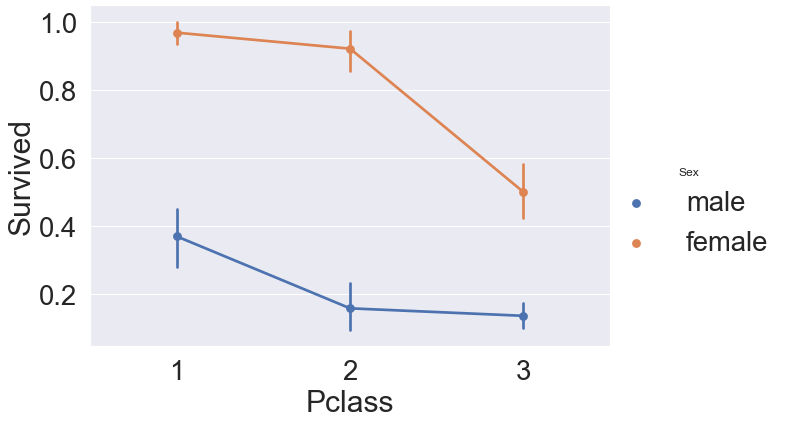

In [168]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

* 모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있습니다.


* 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률 높습니다.

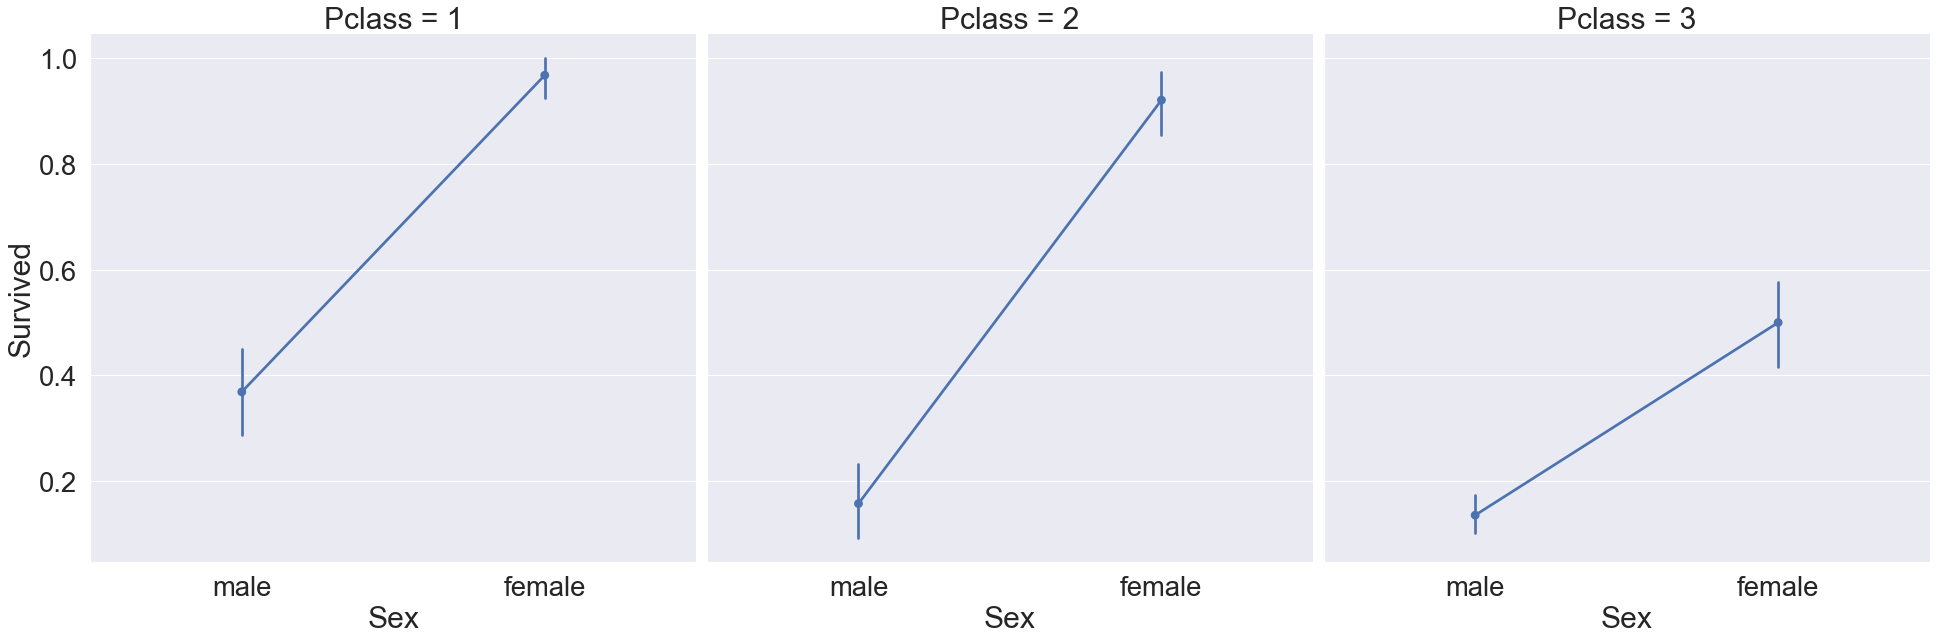

In [169]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1)

## Age

In [170]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


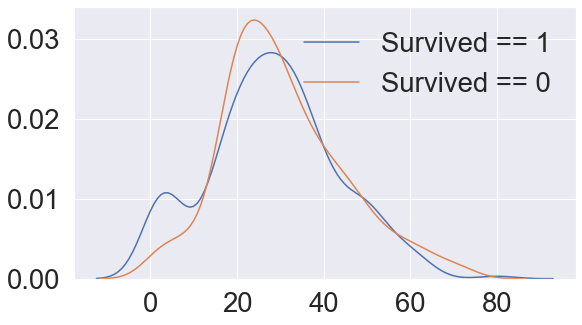

In [171]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()
# kedplot : 커널 밀도 함수

생존자중 나이가 어린 경우가 많음.

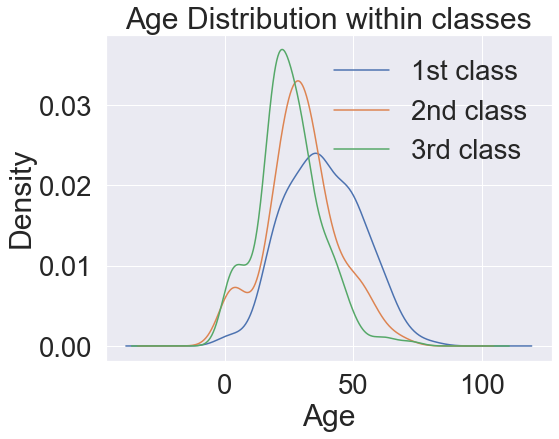

In [172]:
# Age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class','2nd class','3rd class'])

* Class 가 높을 수록 나이 많은 사람의 비중이 커짐.
* 나이대가 변하면서 생존이 증가했다가 감소하는 추세

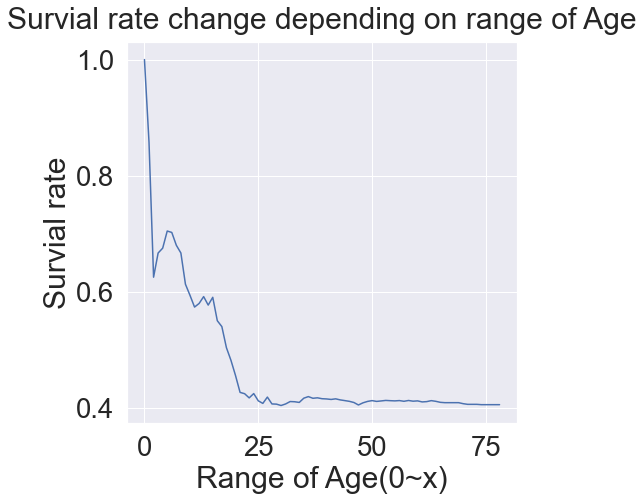

In [173]:
cummulate_survial_ratio = []
for i in range(1,80) : 
    cummulate_survial_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))
                                   
plt.figure(figsize=(7,7))
plt.plot(cummulate_survial_ratio)                    
plt.title('Survial rate change depending on range of Age',y=1.02)
plt.ylabel('Survial rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 나이가 어릴 수록 생존률이 확실히 높은것을 확인
* 나이가 중요한 feature 로 쓰일 수 있음을 확인

## Pclass, Sex, Age

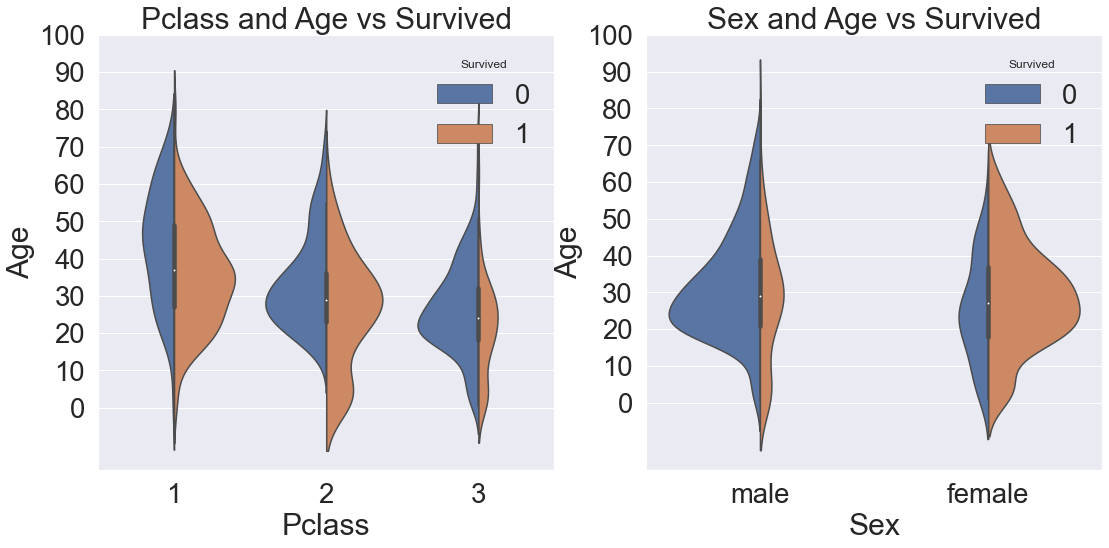

In [174]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=df_train, scale='count',split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=df_train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* 왼쪽 : Pclass 별로 생존에 따른 Age의 distribution 
* 오른쪽 : Sex 별로 생존에 따른 Age의 distribution 
* 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있음.
* 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있음. 
* 여성과 아이를 먼저 챙긴 것으로 추론할 수 있어 보임.

## Embarked 
탑승한 항구

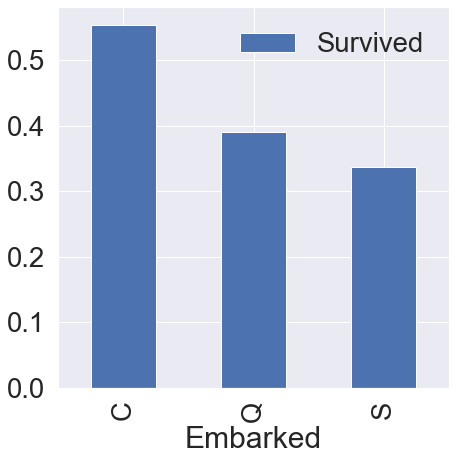

In [175]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

* 조금의 차이는 있지만 생존률은 거의 비슷해보이며 C가 제일 높음.

Text(0.5, 1.0, '(4) Embarked vs Pclass')

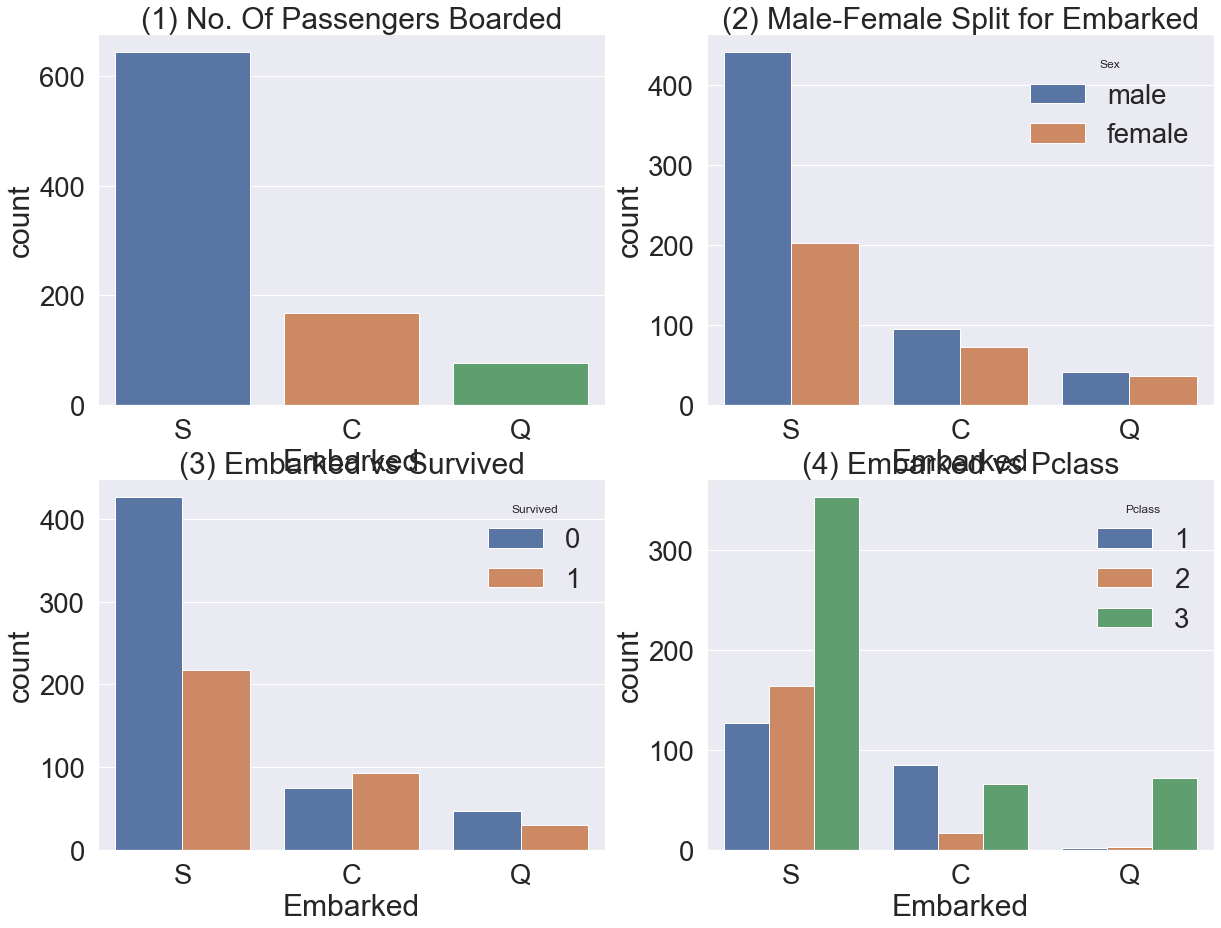

In [176]:
# 다른 feature로 split
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train, ax=ax[0,0])
sns.countplot('Embarked',hue='Sex',data=df_train, ax=ax[0,1])
sns.countplot('Embarked',hue='Survived',data=df_train, ax=ax[1,0])
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])

ax[0,0].set_title('(1) No. Of Passengers Boarded')
ax[0,1].set_title('(2) Male-Female Split for Embarked')
ax[1,0].set_title('(3) Embarked vs Survived')
ax[1,1].set_title('(4) Embarked vs Pclass')

* Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.  
* Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많음..  
* Figure(3) - S 경우 생존자가 사망자 수보다 비교적 적음 (이전 그래프에서도 확인 가능)    
* Figure(4) - Class 로 split 해서 보니, C는 상대적으로 1st class가 많이 탑승한 반면 S는 3rd class 가 많이 탑승했음을 알 수 있음.

## Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [177]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FanmilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [178]:
print("Max size of family : ",df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Max size of family :  11
Minimum size of Family:  1


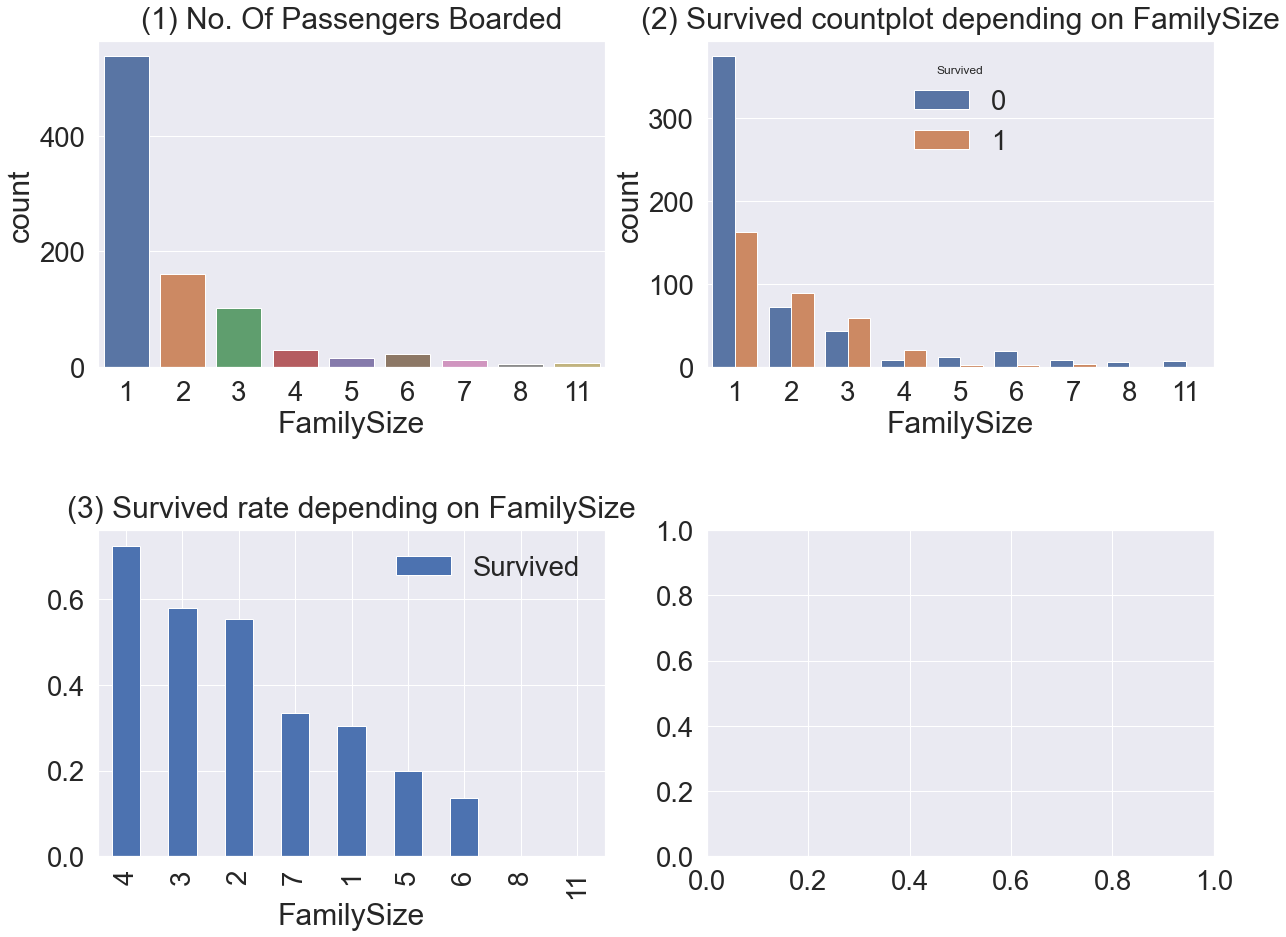

In [179]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('FamilySize', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[1,0])
ax[1,0].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
* Figure (2), (3) - 가족 크기에 따른 생존비교 : 
    *  4명인 경우가 가장 생존확률이 높음. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 작아짐.  
    *  가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작아짐. 
    *  3~4명 선에서 생존확률이 높은 걸 확인가능

## Fare

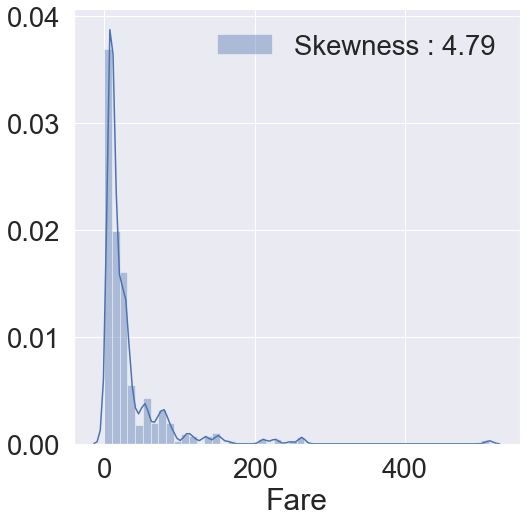

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.


* outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.


* 여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다. dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.


* 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!

In [181]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

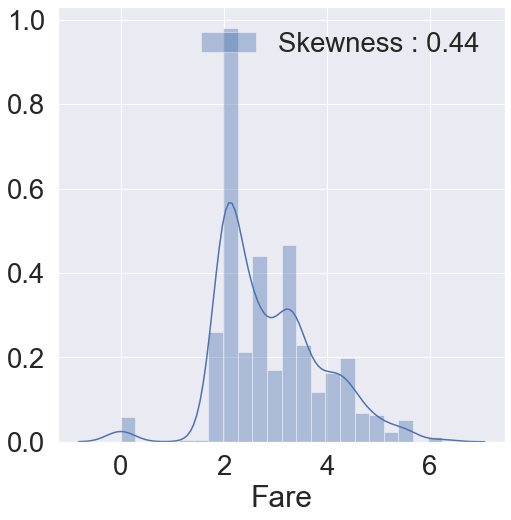

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.


* 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.


* 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.


* 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.

## Cabin

NaN 이 대략 80%  
생존에 영향을 미칠 중요한 정보를 얻어내기가 힘들다고 판단함.  
※ 특성 사용하지 않음. ※

## Ticket
추가적인 고찰 필요

In [183]:
df_train['Ticket']  # 문자형임을 알 수 있음.

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [184]:
df_train['Ticket'].value_counts()

1601          7
CA. 2343      7
347082        7
347088        6
3101295       6
             ..
2697          1
113767        1
336439        1
C.A. 31026    1
C.A. 17248    1
Name: Ticket, Length: 681, dtype: int64

# Feature engineering

In [185]:
! pip install plotly

In [186]:
import plotly

In [187]:
# import numpy as np
# mport pandas as pd
from pandas import Series
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.style.use('seaborn')
# sns.set(font_scale=2.5) 


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#ignore warnings
# import warnings
# warnings.filterwarnings('ignore')



%matplotlib inline

# df_train = pd.read_csv('../input/train.csv')
# df_test = pd.read_csv('../input/test.csv')
# df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
# df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

# df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

# df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
# df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

## Fill Null data

### Fill Null in Age using title

* Age 에는 null data가 177개나 있습니다. 이를 채울 수 있는 여러 아이디어가 있을 것인데, 여기서 우리는 title + statistics 를 사용해 보겠습니다.  
* 영어에서는 Miss, Mrr, Mrs 같은 title이 존재합니다. 각 탑승객의 이름에는 꼭 이런 title 이 들어가게 되는데 이를 사용해보겠습니다.  

* pandas series 에는 data 를 string 으로 바꿔주는 str method, 거기에 정규표현식을 적용하게 해주는 extract method가 있습니다. 이를 사용하여 title 을 쉽게 추출할 수 있습니다. title을 Initial column에 저장하겠습니다

In [188]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
    
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [189]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [190]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [191]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


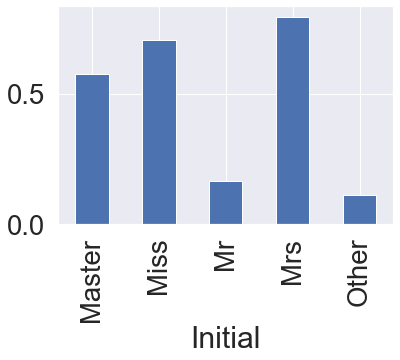

In [192]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

* 이제 본격적으로 Null 을 채울 것입니다. null data 를 채우는 방법은 정말 많이 존재합니다. statistics 를 활용하는 방법도 있고, null data 가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있습니다. 여기서는 statistics 를 활용하는 방법을 사용할 것입니다.
* 여기서 statistics 는 train data 의 것을 의미합니다. 우리는 언제나 test 를 unseen 으로 둔 상태로 놔둬야 하며, train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워줘야 합니다.

In [193]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

null 채우기  
[참고] : https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 

### Fill Null in Embarked

In [194]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [195]:
df_train['Embarked'].fillna('S', inplace=True)

* Embarked 는 Null value 가 2개이고, S 에서 가장 많은 탑승객이 있었으므로, 간단하게 Null 을 S로 채우겠습니다.
* dataframe 의 fillna method 를 이용하면 쉽게 채울 수 있습니다. 여기서 inplace=True 로 하면 df_train 에 fillna 를 실제로 적용하게 됩니다

## Change Age (continuous to categorical)

* Age 는 현재 continuous feature 입니다. 이대로 써도 모델을 세울 수 있지만, Age 를 몇개의 group 으로 나누어 category 화 시켜줄 수 도 있습니다. continuous 를 categorical 로 바꾸면 자칫 information loss 가 생길 수도 있습니다만, 본 튜토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하겠습니다.

* 방법은 여러가지가 있습니다. dataframe 의 indexing 방법인 loc 를 사용하여 직접해줄 수 있고, 아니면 apply 를 사용해 함수를 넣어줄 수 있습니다.


* 1. loc   
    * 첫번째로 loc 를 사용한 방법입니다. loc 는 자주쓰게 되므로 그 사용법을 숙지하시면 좋습니다.
    * 나이는 10살 간격으로 나누겠습니다.

In [196]:

df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

* 2. apply
    * 두번째로 간단한 함수를 만들어 apply 메소드에 넣어주는 방법입니다.

    * 훨씬 수월합니다.

In [197]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

* 두가지 방법이 잘 적용됬다면, 둘다 같은 결과를 내야합니다.
* 이를 확인하기 위해 Series 간 boolean 비교 후 all() 메소드를 사용합시다. all() 메소드는 모든 값이 True 면 True, 하나라도 False 가 있으면 False 를 줍니다.

In [198]:
print((df_train['Age_cat'] == df_train['Age_cat_2']).all())

True


In [199]:
# 중복 컬럼 제거
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

## Change Initial, Embarked and Sex (string to numerical)

* 현재 Initial 은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있습니다. 이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때 우리가 해야할 것은 먼저 컴퓨터가 인식할 수 있도록 수치화 시켜야 합니다.


* map method 를 가지고 간단히 할 수 있습니다.


* 사전 순서대로 정리하여 mapping 하겠습니다

In [200]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

* Embarked 도 C, Q, S로 이루어져 있습니다. map 을 이용해 바꿔봅시다.
* 그러기 앞서서, 특정 column 에 어떤 값들이 있는 지 확인해보는 방법을 잠깐 살펴보겠습니다. 간단히 unique() 메소드를 쓰거나, value_counts() 를 써서 count 까지 보는 방법이 있습니다.

In [201]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [202]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [203]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

* 한번 Null 이 사라졌는지 확인해봅시다. Embarked Column만 가져온 것은 하나의 pandas의 Series 객체므로, isnull() 메소드를 사용해 Series의 값들이 null 인지 아닌지에 대한 boolean 값을 얻을 수 있습니다.  


* 이것에 any() 를 사용하여, True 가 단하나라도 있을 시(Null이 한개라도 있을 시) True 를 반환해주게 됩니다. 우리는 Null 을 S로 다 바꿔주었으므로 False 를 얻게 됩니다

In [204]:
df_train['Embarked'].isnull().any()

False

In [205]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

* heatmap을 통한 상관관계 확인

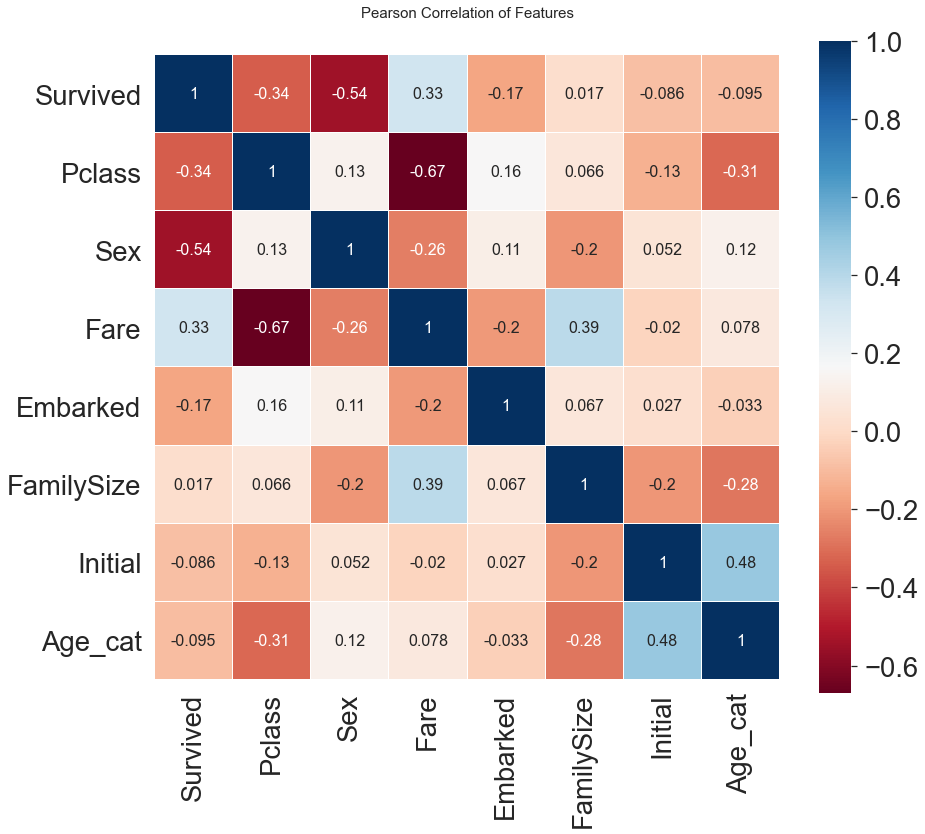

In [206]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

* 우리가 EDA에서 살펴봤듯이, Sex 와 Pclass 가 Survived 에 상관관계가 어느 정도 있음을 볼 수 있습니다.


* 생각보다 fare 와 Embarked 도 상관관계가 있음을 볼 수 있습니다.


* 또한 우리가 여기서 얻을 수 있는 정보는 서로 강한 상관관계를 가지는 feature들이 없다는 것입니다.


* 이것은 우리가 모델을 학습시킬 때, 불필요한(redundant, superfluous) feature 가 없다는 것을 의미합니다. 1 또는 -1 의 상관관계를 가진 feature A, B 가 있다면, 우리가 얻을 수 있는 정보는 사실 하나일 거니까요.


* 이제 실제로 모델을 학습시키기 앞서서 data preprocessing (전처리)을 진행해보겠습니다. 거의 다 와갑니다 힙냅시다

## One-hot encoding on Initial and Embarked

In [207]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [208]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## Drop columns

In [209]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [210]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [211]:
df_test.head()

,Pclass,Sex,Fare,FanmilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


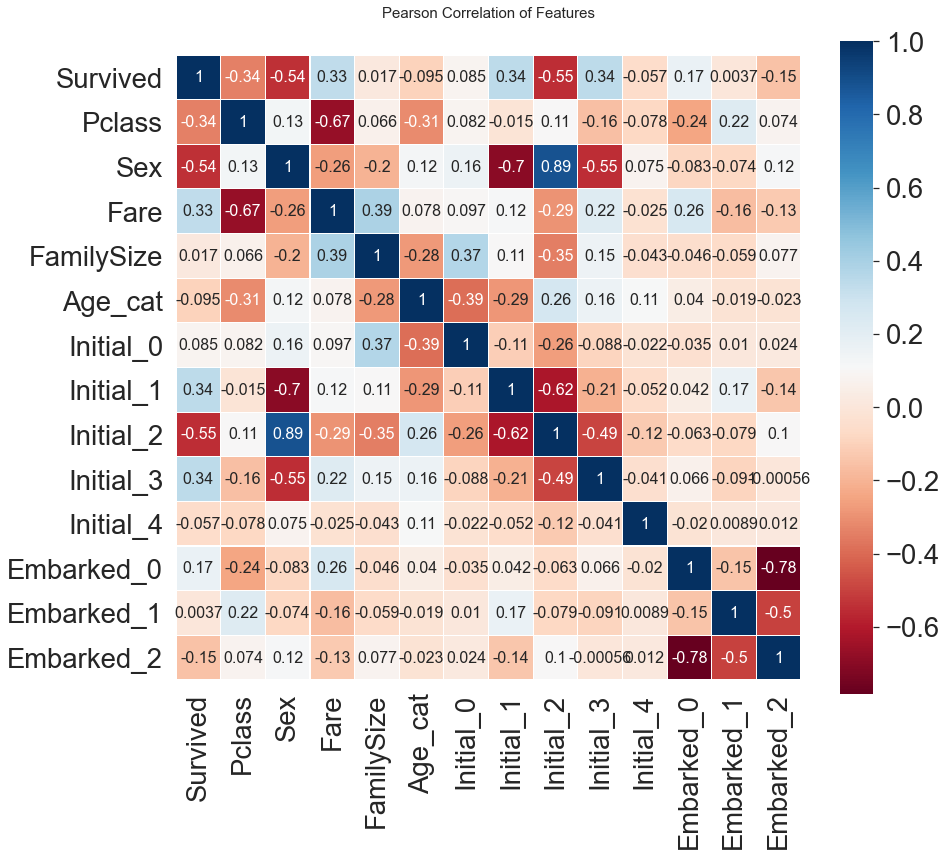

In [212]:
heatmap_data = df_train 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

# Building machine learning model and prediction using the trained model

In [213]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier 입니다. 
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.

*  Sklearn 은 머신러닝의 처음부터 끝까지가 다 있습니다. feature engineering, preprocessing, 지도 학습 알고리즘, 비지도 학습 알고리즘, 모델 평가, 파이프라인 등 머신러닝에 관련된 모든 작업들이 손쉬운 인터페이스로 구현되어 있습니다. 데이터 분석 + 머신러닝을 하고싶다면, 이 라이브러리는 반드시 숙지해야합니다.
*  파이썬 라이브러리를 활용한 머신러닝(Introduction to machine larning with Python)책을 사서 공부하시길 매우 추천해드립니다.

*  지금 타이타닉 문제는 target class(survived)가 있으며, target class 는 0, 1로 이루어져 있으므로(binary) binary classfication 문제입니다.


* 우리가 지금 가지고 있는 train set 의 survived를 제외한 input 을 가지고 모델을 최적화시켜서 각 샘플(탑승객)의 생존유무를 판단하는 모델을 만들어 냅니다.


* 그 후 모델이 학습하지 않았던 test set 을 input 으로 주어서 test set 의 각 샘플(탑승객)의 생존 유무를 예측해봅니다.

## Preparation - Split dataset into train, valid and test set

In [214]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

* 보통 train, test 만 언급되지만, 실제 좋은 모델을 만들기 위해서 우리는 valid set을 따로 만들어 모델 평가를 해봅니다.


* 마치 축구대표팀이 팀훈련(train)을 하고 바로 월드컵(test)로 나가는 것이 아니라, 팀훈련(train)을 한 다음 평가전(valid)를 거쳐 팀의 훈련 정도(학습정도)를 확인하고 월드컵(test)에 나가는 것과 비슷합니다.


* train_test_split 을 사용하여 쉽게 train 셋을 분리할 수 있습니다.

In [215]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

sklearn 지원 알고리즘  
 http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

*  본 튜토리얼에서는 랜덤포레스트 모델을 사용하도록 하겠습니다.


* 랜덤포레스트는 결정트리기반 모델이며, 여러 결정 트리들을 앙상블한 모델입니다. 더 구체적인 모델 설명은 여러 블로그들 참고하시면 될 것이고, 저도 한번 추후 다뤄보겠습니다.


* 각 머신러닝 알고리즘에는 여러 파라미터들이 있습니다. 랜덤포레스트분류기도 n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf 등 여러 파라미터들이 존재합니다. 이것들이 어떻게 세팅되냐에 따라 같은 데이터셋이라 하더라도 모델의 성능이 달라집니다.

*  파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해 등이 필요합니다. 결국 많이 써봐야 모델도 잘 세울 수 있는 것이죠. 그래서 캐글을 추천합니다. 여러 데이터셋을 가지고 모델을 이리저리 써봐야 튜닝하는 감이 생길테니까요!


* 일단 지금은 튜토리얼이니 파라미터 튜닝은 잠시 제쳐두기로 하고, 기본 default 세팅으로 진행하겠습니다.


* 모델 객체를 만들고, fit 메소드로 학습시킵니다.


* 그런 후 valid set input 을 넣어주어 예측값(X_vld sample(탑승객)의 생존여부)를 얻습니다.

## Model generation and prediction

In [216]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [217]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.84% 정확도로 생존을 맞춤


## Feature importance

*  학습된 모델은 feature importance 를 가지게 되는데, 우리는 이것을 확인하여 지금 만든 모델이 어떤 feature 에 영향을 많이 받았는 지 확인할 수 있습니다.


*  쉽게 말해, 10 = 4x1 + 2x2 + 1*x3 을 생각하면, 우리는 x1이 결과값(10)에 큰 영향을 준다고 생각 할 수 있습니다. feature importance 는 4, 2, 1 을 이야기하며, x1이 가장 큰 값(4)를 가지므로, 이 모델에 가장 큰 영향을 미친다고 말할 수 있습니다.


*  학습된 모델은 기본적으로 featureimportances 를 가지고 있어서 쉽게 그 수치를 얻을 수 있습니다.
pandas series 를 이용하면 쉽게 sorting 을 하여 그래프를 그릴 수 있습니다.

In [218]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

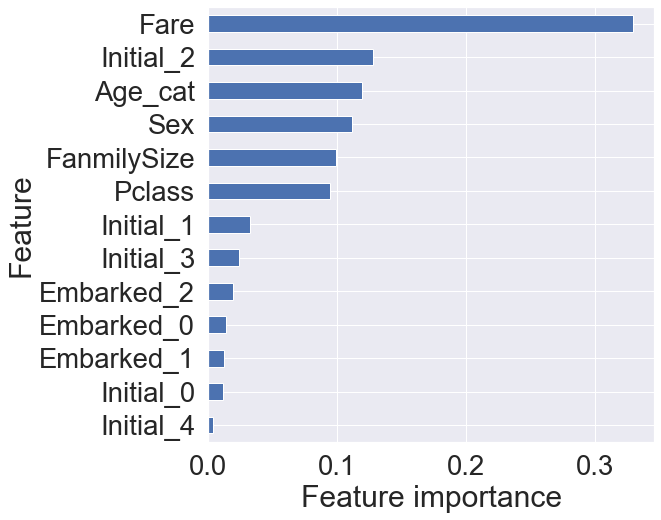

In [219]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

* 우리가 얻은 모델에서는 Fare 가 가장 큰 영향력을 가지며, 그 뒤로 Initial_2, Age_cat, Pclass가 차례로 중요도를 가집니다


* 사실 feature importance 는 지금 모델에서의 importance 를 나타냅니다. 만약 다른 모델을 사용하게 된다면 feature importance 가 다르게 나올 수 있습니다.


* 이 feature importance 를 보고 실제로 Fare 가 중요한 feature 일 수 있다고 판단을 내릴 수는 있지만, 이것은 결국 모델에 귀속되는 하나의 결론이므로 통계적으로 좀 더 살펴보긴 해야합니다.


* featuure importance 를 가지고 좀 더 정확도가 높은 모델을 얻기 위해 feature selection 을 할 수도 있고, 좀 더 빠른 모델을 위해 feature 제거를 할 수 있습니다.

## Feature importance

In [220]:
submission = pd.read_csv('tt_gender_submission.csv')

In [221]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [222]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [223]:
submission.to_csv('./my_first_submission.csv', index=False)

# Conclusion

* 참신한 feature engineering, 머신 러닝 모델 hyperparameter tunning, ensembling 계속 고민하고 학습할 것 

본 튜토리얼은 https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python, https://www.kaggle.com/startupsci/titanic-data-science-solutions, https://www.kaggle.com/ash316/eda-to-prediction-dietanic, https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 을 참고하였습니다.